# An Introduction to Statistical Learning--Exercise and Lab Codes 


In [51]:
import numpy as np
import pandas as pd
from math import sqrt

## Chapter 2

### Question 7

In [50]:
d = {'X1': pd.Series([0,2,0,0,-1,1]),
     'X2': pd.Series([3,0,1,1,0,1]),
     'X3': pd.Series([0,0,3,2,1,1]),
     'Y': pd.Series(['Red','Red','Red','Green','Green','Red'])}
df27 = pd.DataFrame(d)
df27.index = np.arange(1, len(df27) + 1)
df27

,X1,X2,X3,Y
1,0,3,0,Red
2,2,0,0,Red
3,0,1,3,Red
4,0,1,2,Green
5,-1,0,1,Green
6,1,1,1,Red


In [53]:
#Euclidean Distance
df27['distance']=np.sqrt(df27['X1']**2+df27['X2']**2+df27['X3']**2)
df27

,X1,X2,X3,Y,distance
1,0,3,0,Red,3.000000
2,2,0,0,Red,2.000000
3,0,1,3,Red,3.162278
4,0,1,2,Green,2.236068
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051


In [57]:
df27.sort_values('distance')

,X1,X2,X3,Y,distance
5,-1,0,1,Green,1.414214
6,1,1,1,Red,1.732051
2,2,0,0,Red,2.000000
4,0,1,2,Green,2.236068
1,0,3,0,Red,3.000000
3,0,1,3,Red,3.162278


### Question 8


In [1]:
#packages
%matplotlib inline 
# tells the IPython environment to draw the plots immediately after the current cell. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("mako", as_cmap=True)
pd.options.display.float_format = '{:,.2f}'.format # Print only 2 decimal cases.

In [75]:
dfc = pd.read_csv("C:/Users/90533/Desktop/ISLR/DATA/College.csv") # Portable import, works on Windows as well.
dfc.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [22]:
# Column names
for col in dfc.columns:
    print(col)

Private
Apps
Accept
Enroll
Top10perc
Top25perc
F.Undergrad
P.Undergrad
Outstate
Room.Board
Books
Personal
PhD
Terminal
S.F.Ratio
perc.alumni
Expend
Grad.Rate


In [27]:
# Setting index
dfc = dfc.set_index('Unnamed: 0')
dfc.index.name='Name Uni'
dfc.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Name Uni,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [35]:
dfc.describe(include='all')

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,"3,001.64","2,018.80",779.97,27.56,55.80,"3,699.91",855.30,"10,440.67","4,357.53",549.38,"1,340.64",72.66,79.70,14.09,22.74,"9,660.17",65.46
std,NaN,"3,870.20","2,451.11",929.18,17.64,19.80,"4,850.42","1,522.43","4,023.02","1,096.70",165.11,677.07,16.33,14.72,3.96,12.39,"5,221.77",17.18
min,NaN,81.00,72.00,35.00,1.00,9.00,139.00,1.00,"2,340.00","1,780.00",96.00,250.00,8.00,24.00,2.50,0.00,"3,186.00",10.00
25%,NaN,776.00,604.00,242.00,15.00,41.00,992.00,95.00,"7,320.00","3,597.00",470.00,850.00,62.00,71.00,11.50,13.00,"6,751.00",53.00
50%,NaN,"1,558.00","1,110.00",434.00,23.00,54.00,"1,707.00",353.00,"9,990.00","4,200.00",500.00,"1,200.00",75.00,82.00,13.60,21.00,"8,377.00",65.00
75%,NaN,"3,624.00","2,424.00",902.00,35.00,69.00,"4,005.00",967.00,"12,925.00","5,050.00",600.00,"1,700.00",85.00,92.00,16.50,31.00,"10,830.00",78.00


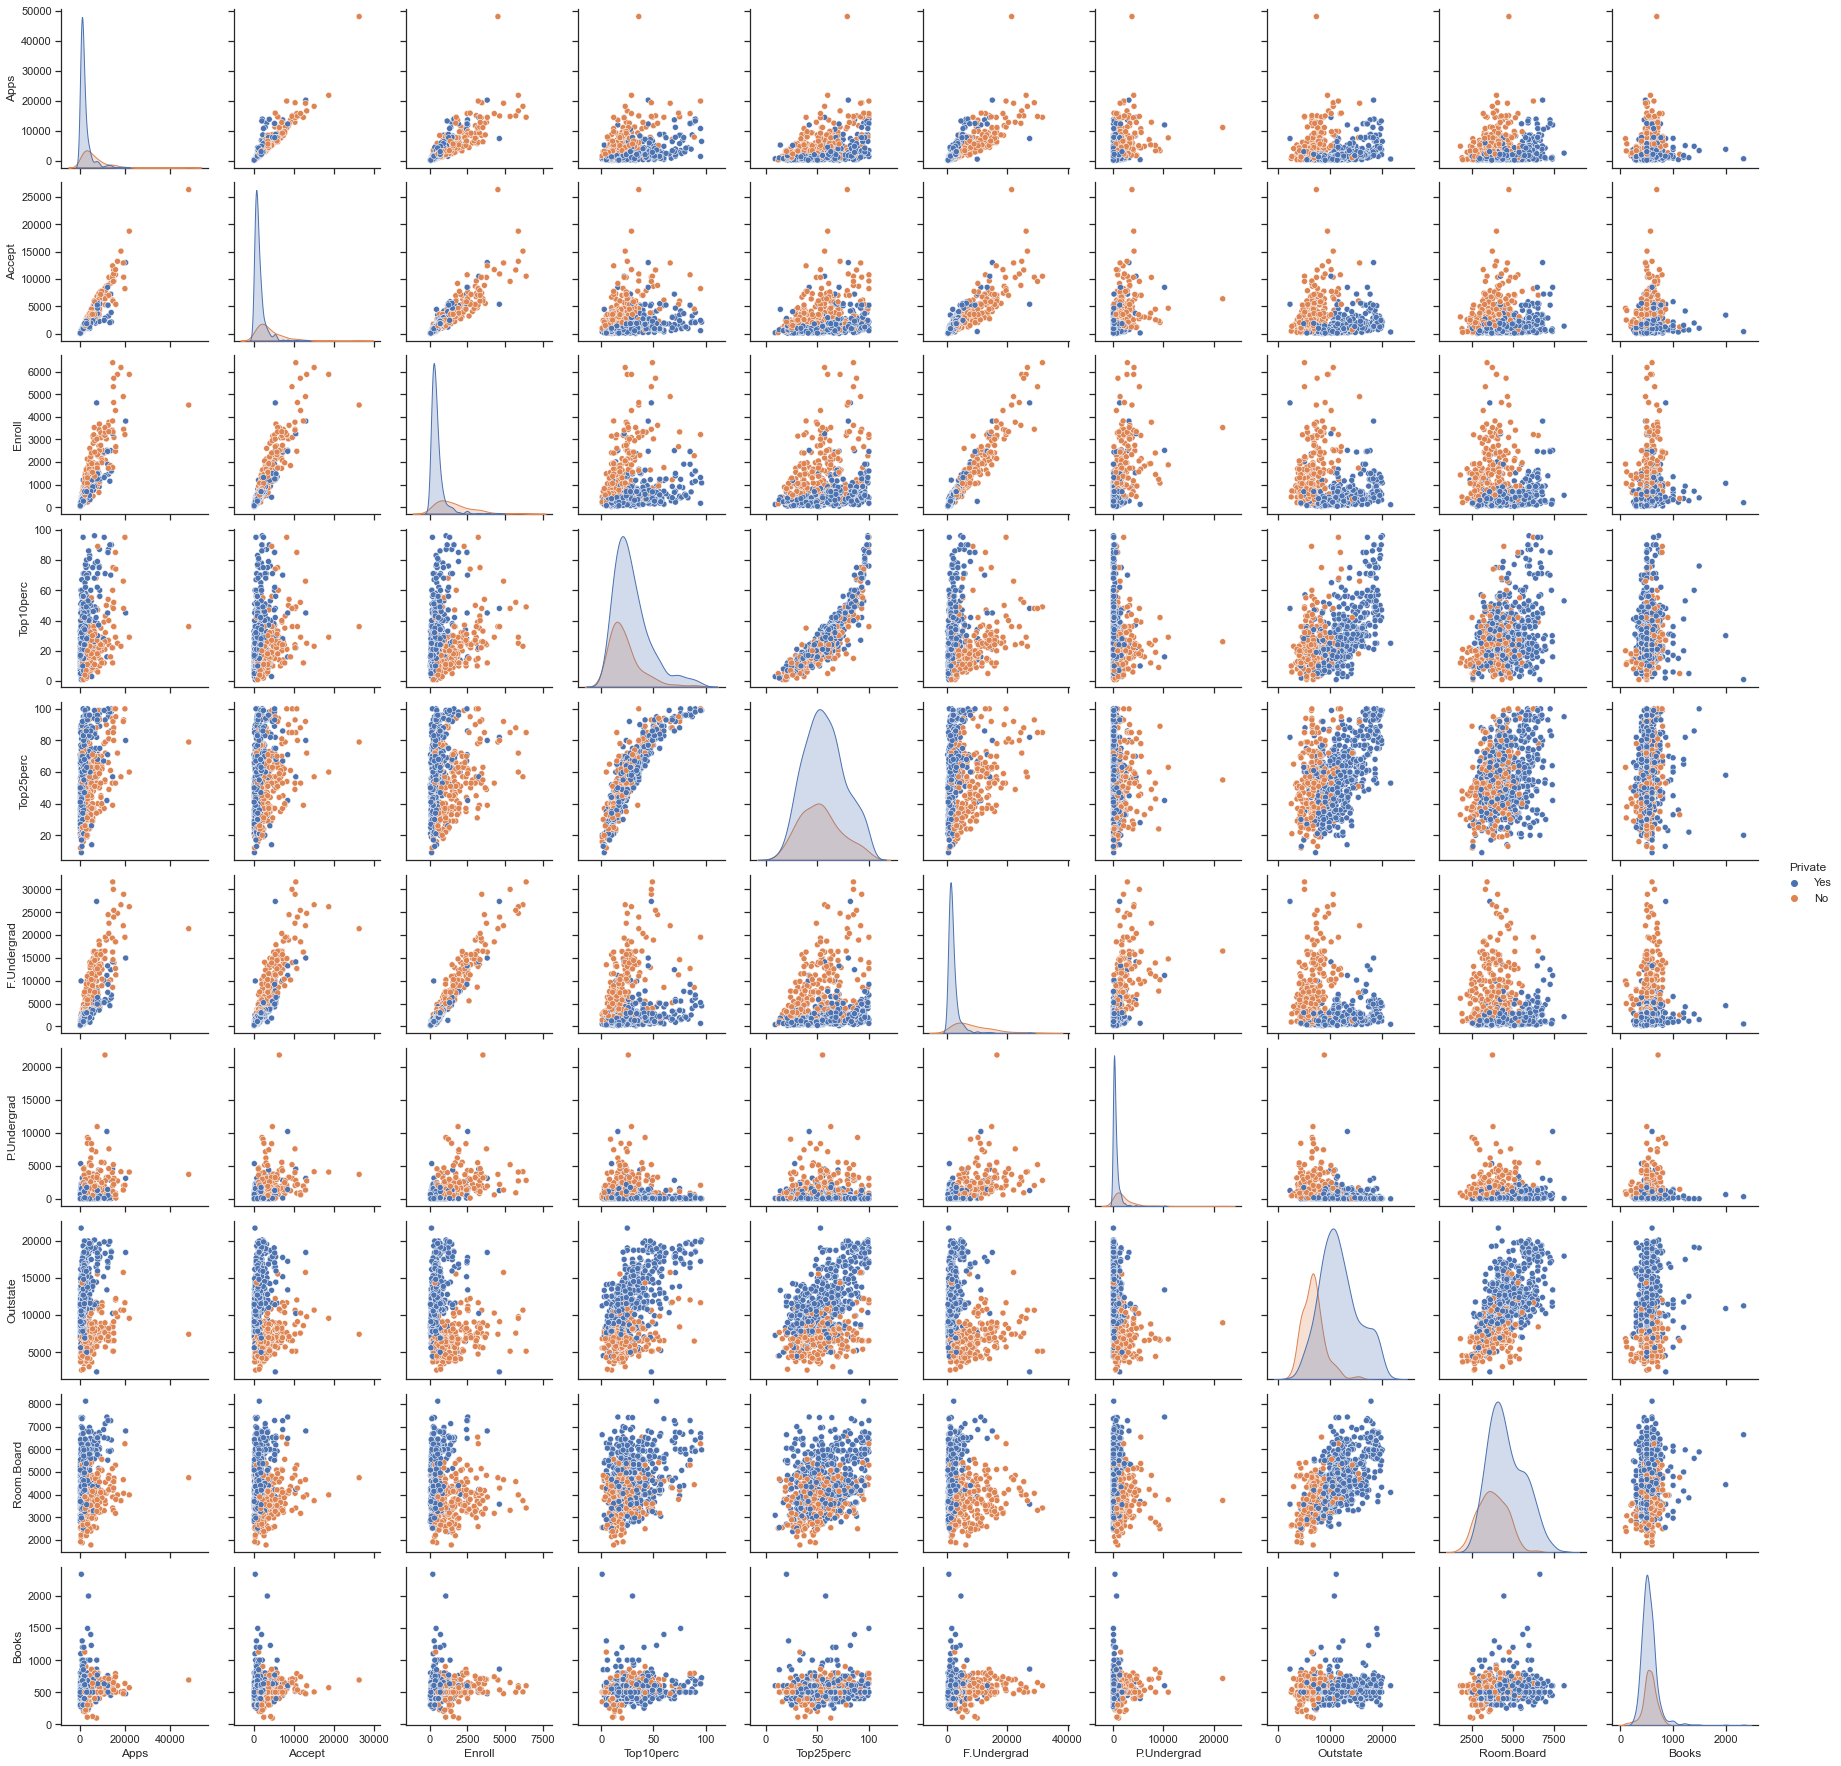

In [46]:
sns.set(style="ticks")
sns.pairplot(dfc,vars=dfc.iloc[:,1:11],hue='Private')

<AxesSubplot:xlabel='Private', ylabel='Outstate'>

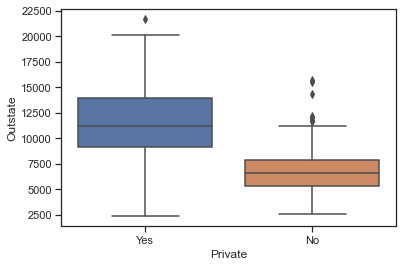

In [47]:
sns.boxplot(x='Private', y='Outstate', data=dfc)

<AxesSubplot:xlabel='Elite', ylabel='Outstate'>

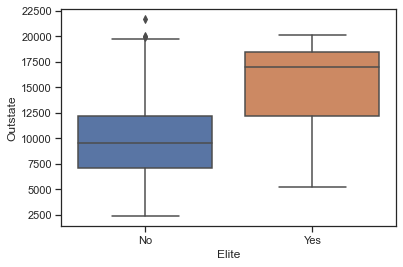

In [49]:
# Elite variable creation
dfc.loc[dfc['Top10perc']>50, 'Elite'] = 'Yes'
dfc['Elite'] = dfc['Elite'].fillna('No')

#boxplot
sns.boxplot(x='Elite', y='Outstate', data=dfc)

In [50]:
dfc['Elite'].describe()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object

In [77]:
dfc['Books'] = pd.cut(dfc['Books'], 2, labels=['Low', 'High'])
dfc['Enroll'] = pd.cut(dfc['Enroll'], 4, labels=['Very low', 'Low', 'High', 'Very high'])
dfc.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,Very low,23,52,2885,537,7440,3300,Low,2200,70,78,18.10,12,7041,60
1,Adelphi University,Yes,2186,1924,Very low,16,29,2683,1227,12280,6450,Low,1500,29,30,12.20,16,10527,56
2,Adrian College,Yes,1428,1097,Very low,22,50,1036,99,11250,3750,Low,1165,53,66,12.90,30,8735,54
3,Agnes Scott College,Yes,417,349,Very low,60,89,510,63,12960,5450,Low,875,92,97,7.70,37,19016,59
4,Alaska Pacific University,Yes,193,146,Very low,16,44,249,869,7560,4120,Low,1500,76,72,11.90,2,10922,15


<AxesSubplot:title={'center':'Enroll'}>

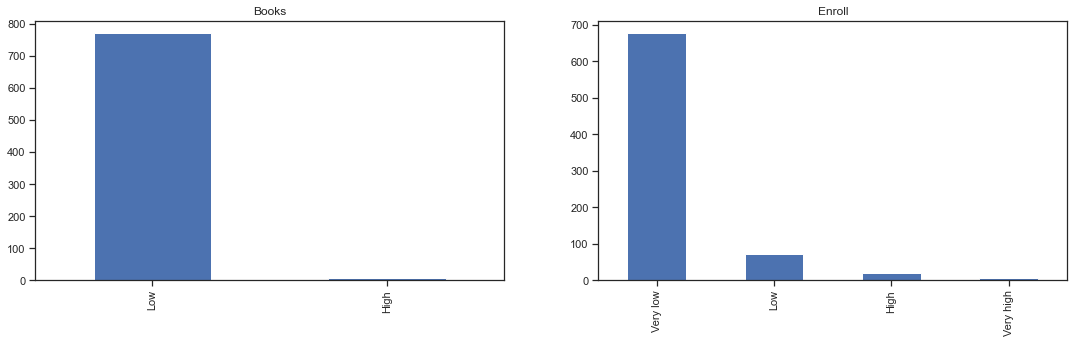

In [82]:
# Histograms-Matplotlib

fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
plt.subplot(221)
dfc['Books'].value_counts().plot(kind='bar', title = 'Books')
plt.subplot(222)
dfc['Enroll'].value_counts().plot(kind='bar', title = 'Enroll')

### Question 9

In [15]:
dfa = pd.read_csv("C:/Users/90533/Desktop/ISLR/DATA/Auto.csv") # Portable import, works on Windows as well.
dfa.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino


In [16]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [25]:
## Checking horsepower
dfa.horsepower.unique()
# there is a ? in the dataset

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [27]:
## Getting rid of question symbol-?
dfa=dfa[dfa['horsepower'] != '?'].copy()
dfa['horsepower'] = pd.to_numeric(dfa['horsepower'])
#The copy() method creates a new copy of the filtered DataFrame, which is assigned to a new variable called dfa.

In [30]:
dfa['horsepower'].unique() # No ?

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82], dtype=int64)

In [37]:
quantitative=dfa.loc[:8] # or df.select_dtypes(include=['number']).columns
d = quantitative.describe()
d.loc['range']=d.loc['max']-d.loc['min']
d.loc['range']

mpg              4.00
cylinders        0.00
displacement   153.00
horsepower      95.00
weight         992.00
acceleration     3.50
year             0.00
origin           0.00
Name: range, dtype: float64

In [41]:
d.loc[['mean','std','range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,15.67,8.00,373.22,177.00,"3,883.00",10.50,70.00,1.00
std,1.66,0.00,69.48,37.45,458.23,1.25,0.00,0.00
range,4.00,0.00,153.00,95.00,992.00,3.50,0.00,0.00


In [46]:
## 2.9-d
dfa_n = dfa.drop(dfa.index[10:86])
dfa_n

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.00,8,307.00,130,3504,12.00,70,1,chevrolet chevelle malibu
1,15.00,8,350.00,165,3693,11.50,70,1,buick skylark 320
2,18.00,8,318.00,150,3436,11.00,70,1,plymouth satellite
3,16.00,8,304.00,150,3433,12.00,70,1,amc rebel sst
4,17.00,8,302.00,140,3449,10.50,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.00,4,140.00,86,2790,15.60,82,1,ford mustang gl
393,44.00,4,97.00,52,2130,24.60,82,2,vw pickup
394,32.00,4,135.00,84,2295,11.60,82,1,dodge rampage
395,28.00,4,120.00,79,2625,18.60,82,1,ford ranger


In [49]:
d2 = dfa_n.describe()
d2.loc['range']= d2.loc['max']-d2.loc['min']
d2.loc['range']
d2.loc[['mean','std','range']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mean,24.41,5.37,187.51,100.85,"2,936.53",15.72,77.14,1.60
std,7.86,1.65,100.11,35.95,811.87,2.71,3.12,0.82
range,35.60,5.00,387.00,184.00,"3,348.00",16.30,12.00,2.00


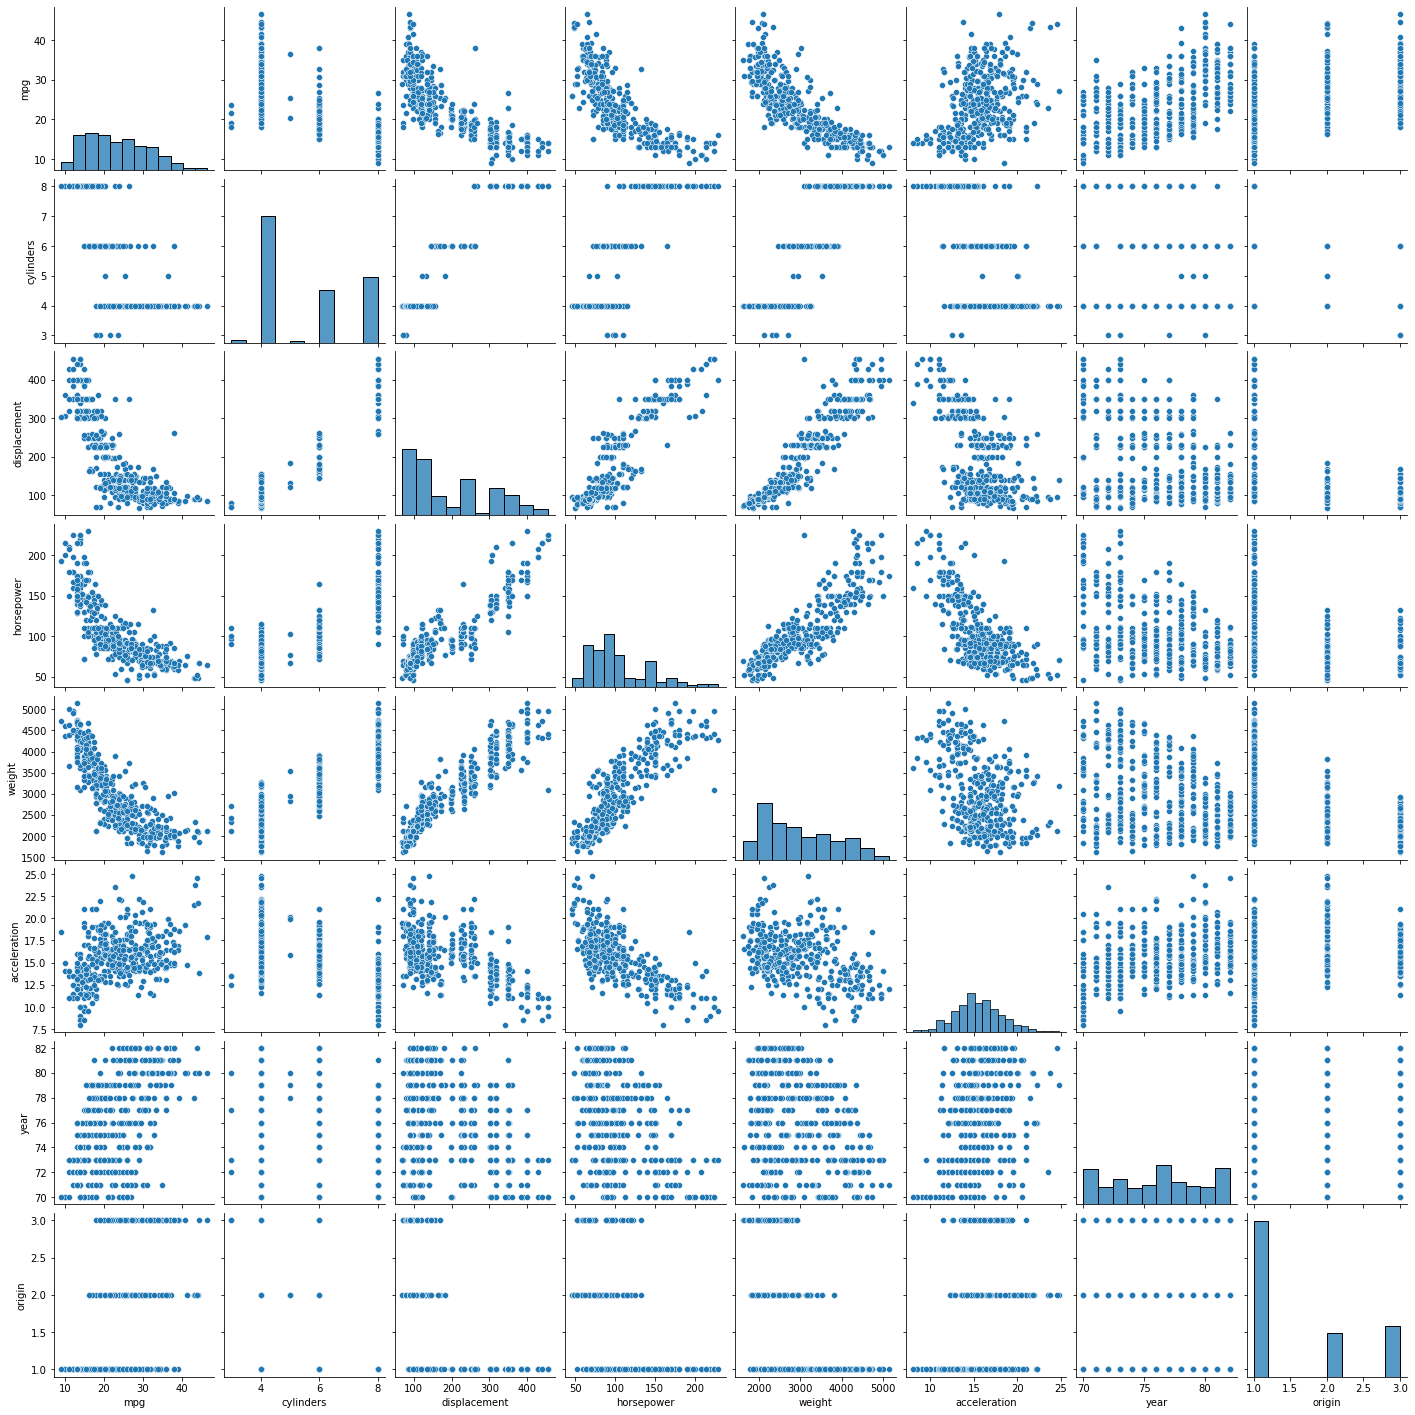

In [52]:
sns.pairplot(dfa)

##### d)
acceleration,weight,horseposer and displacement. The relationships between these variables can be seen from the graphs.

